In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [64]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 20) 
mpl.rc('ytick', labelsize = 20)

In [35]:
colors = ['#2a9d8f', '#2a9d8f', '#e76f51', '#e76f51', '#eba75f', '#eba75f', '#2f4f4f', '#2f4f4f']

In [36]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years/'

In [37]:
detectors_ntw = ['ET_2L_15_cryo_45deg_2CE','ET_delta_10_cryo_2CE','ET_2L_15_cryo_45deg_1CE',
'ET_delta_10_cryo_1CE','ET_2L_15_cryo_45deg_LVKI','ET_2L_15_cryo_45deg','ET_delta_10_cryo_LVKI',
'ET_delta_10_cryo']

lbs_list = ['ET-2L+2CE', 'ET-$\Delta$+2CE', 'ET-2L+1CE', 'ET-$\Delta$+1CE',
'ET-2L+LVKI', 'ET-2L', 'ET-$\Delta$+LVKI', 'ET-$\Delta$']
				

lbs = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_mass_1', 
	   'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

In [38]:
alpha = '1.0'
eos = 'BLh_uniform'
params = ['network_SNR', 'luminosity_distance', 'theta_jn', 'mass_1', 'lambda_1']
xaxis_lbs_list = ['network SNR', '$\Delta d_L/d_L$', '$\Delta \iota/\iota$', '$\Delta m_1/m_1$', '$\Delta \Lambda_1/\Lambda_1$']

In [39]:
my_alpha = 0.1
my_linewidth = 1.5

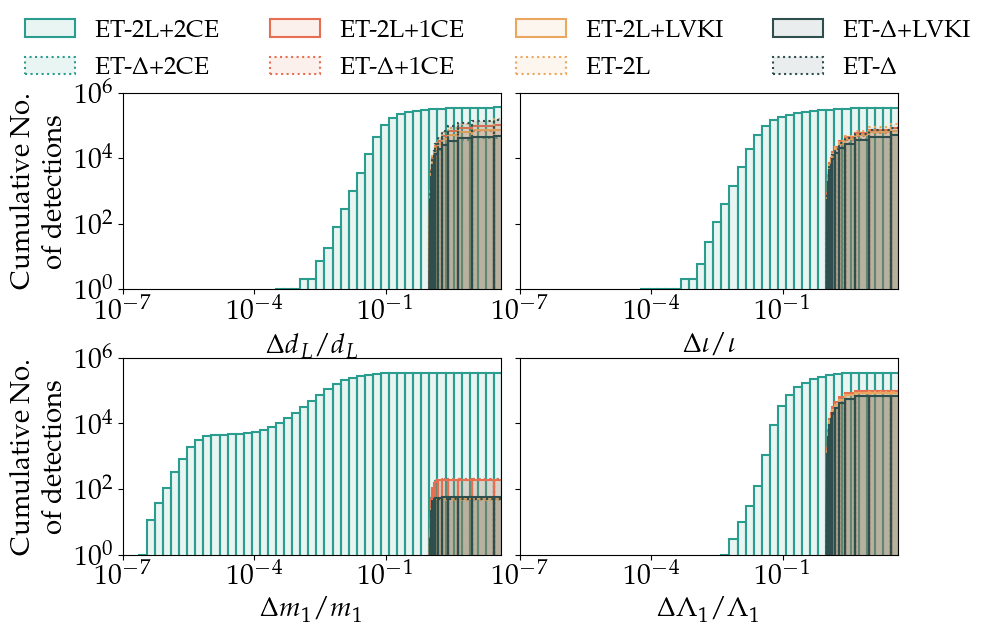

In [ ]:
# plot cumulative histograms of relative errors
fig, axs = plt.subplots(2,2,figsize = (10,6), sharex = False, sharey = True)

ax = axs.ravel()

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')
    df = df.dropna()

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # relative errors
    for j, param in enumerate(params[1:]):
        sns.histplot(df['err_%s' %param]/df[param], bins = np.logspace(-7, 2, 50), cumulative = True, color = colors[i], alpha=my_alpha, 
                linestyle=my_linestyle, edgecolor=colors[i], linewidth=my_linewidth, ax = ax[j])
        ax[j].set_ylabel('Cumulative No. \n of detections', fontsize = 20)
        ax[j].set_xlabel(xaxis_lbs_list[j+1], fontsize = 20)
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        ax[j].set_xlim(10**-7, 40)
        ax[j].set_ylim(1, 10**6)


fig.subplots_adjust(hspace = 0.35, wspace = 0.05)
fig.legend(lbs_list, loc='upper center', fontsize=18, ncols=4, bbox_to_anchor=(0.5, 1.04), frameon=False)
plt.savefig('plots/kn_param_errs_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()
